## Keras -- MLPs on MNIST

In [1]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 8446053890093840833
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 3066683593371740948
physical_device_desc: "device: XLA_CPU device"
]


In [2]:
# if you keras is not using tensorflow as backend set "KERAS_BACKEND=tensorflow" use this command
from tensorflow.python.keras.utils import np_utils 
from tensorflow.python.keras.datasets import mnist 
import seaborn as sns
from tensorflow.python.keras.initializers import RandomNormal

In [3]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import time
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

In [4]:
# the data, shuffled and split between train and test sets 
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [5]:
print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d, %d)"%(X_train.shape[1], X_train.shape[2]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d, %d)"%(X_test.shape[1], X_test.shape[2]))

Number of training examples : 60000 and each image is of shape (28, 28)
Number of training examples : 10000 and each image is of shape (28, 28)


In [6]:
# if you observe the input shape its 2 dimensional vector
# for each image we have a (28*28) vector
# we will convert the (28*28) vector into single dimensional vector of 1 * 784 

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2]) 
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2]) 

In [7]:
# after converting the input images from 3d to 2d vectors

print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d)"%(X_train.shape[1]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d)"%(X_test.shape[1]))

Number of training examples : 60000 and each image is of shape (784)
Number of training examples : 10000 and each image is of shape (784)


In [8]:
# if we observe the above matrix each cell is having a value between 0-255
# before we move to apply machine learning algorithms lets try to normalize the data
# X => (X - Xmin)/(Xmax-Xmin) = X/255

X_train = X_train/255
X_test = X_test/255

In [9]:
# here we are having a class number for each image
print("Class label of first image :", y_train[0])

# lets convert this into a 10 dimensional vector
# ex: consider an image is 5 convert it into 5 => [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
# this conversion needed for MLPs 

Y_train = np_utils.to_categorical(y_train, 10) 
Y_test = np_utils.to_categorical(y_test, 10)

print("After converting the output into a vector : ",Y_train[0])

Class label of first image : 5
After converting the output into a vector :  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


<h2>  Model 1

In [10]:
from tensorflow.python import keras as keras
from tensorflow.python.keras.models import Sequential 
from tensorflow.python.keras.layers import Dense, Activation , Dropout


In [11]:
# some model parameters

output_dim = 10
input_dim = X_train.shape[1]

batch_size = 128 
nb_epoch = 10

In [12]:
# start building a model
model = Sequential()
model.add(Dense(512, activation='sigmoid', input_shape=(input_dim,)))
model.add(Dense(128, activation='sigmoid'))
model.add(Dense(output_dim, activation='softmax'))

model.summary()

W0906 09:49:46.691827 140068600190784 deprecation.py:506] From /home/vimal/anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________


In [13]:


model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test)) 


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 52us/sample - loss: 0.5444 - acc: 0.8600 - val_loss: 0.2513 - val_acc: 0.9271
Epoch 2/10
60000/60000 [==============================] - 3s 48us/sample - loss: 0.2214 - acc: 0.9343 - val_loss: 0.1933 - val_acc: 0.9444
Epoch 3/10
60000/60000 [==============================] - 3s 48us/sample - loss: 0.1634 - acc: 0.9524 - val_loss: 0.1475 - val_acc: 0.9561
Epoch 4/10
60000/60000 [==============================] - 3s 50us/sample - loss: 0.1255 - acc: 0.9628 - val_loss: 0.1216 - val_acc: 0.9644
Epoch 5/10
60000/60000 [==============================] - 3s 48us/sample - loss: 0.0995 - acc: 0.9708 - val_loss: 0.0997 - val_acc: 0.9690
Epoch 6/10
60000/60000 [==============================] - 3s 48us/sample - loss: 0.0791 - acc: 0.9772 - val_loss: 0.0855 - val_acc: 0.9737
Epoch 7/10
60000/60000 [==============================] - 3s 49us/sample - loss: 0.0633 - acc: 0.9816 - val_loss: 0.

In [14]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.06783973545711487
Test accuracy: 0.9789


 <h3> Model2

In [15]:
# Multilayer perceptron

# start building a model
model2 = Sequential()
model2.add(Dense(256, activation='relu', input_shape=(input_dim,)))
model2.add(Dense(256,activation='relu'))
model2.add(Dense(output_dim, activation='softmax'))

model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_4 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                2570      
Total params: 269,322
Trainable params: 269,322
Non-trainable params: 0
_________________________________________________________________


In [16]:
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history2 = model2.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 68us/step - loss: 0.2626 - acc: 0.9238 - val_loss: 0.1363 - val_acc: 0.9576
Epoch 2/10
60000/60000 [==============================] - 4s 60us/step - loss: 0.0982 - acc: 0.9700 - val_loss: 0.0936 - val_acc: 0.9707
Epoch 3/10
60000/60000 [==============================] - 4s 59us/step - loss: 0.0636 - acc: 0.9802 - val_loss: 0.0865 - val_acc: 0.9724
Epoch 4/10
60000/60000 [==============================] - 4s 63us/step - loss: 0.0443 - acc: 0.9860 - val_loss: 0.0731 - val_acc: 0.9772
Epoch 5/10
60000/60000 [==============================] - 4s 61us/step - loss: 0.0331 - acc: 0.9892 - val_loss: 0.0751 - val_acc: 0.9765
Epoch 6/10
60000/60000 [==============================] - 4s 59us/step - loss: 0.0258 - acc: 0.9919 - val_loss: 0.0751 - val_acc: 0.9791
Epoch 7/10
60000/60000 [==============================] - 4s 61us/step - loss: 0.0211 - acc: 0.9932 - val_loss: 0.0907 - val_acc

In [17]:
score = model2.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])


Test score: 0.08857447017969135
Test accuracy: 0.9788


<h2>Model 3

In [31]:
# Multilayer perceptron


model3 = Sequential()
model3.add(Dense(1024, activation='relu', input_shape=(input_dim,), kernel_initializer=keras.initializers.lecun_uniform(seed=None)))
model3.add(Dense(512, activation='relu', kernel_initializer=keras.initializers.lecun_uniform(seed=None)) )
model3.add(Dropout(.2))
model3.add(Dense(128, activation='relu', kernel_initializer=keras.initializers.lecun_uniform(seed=None)) )
model3.add(Dense(output_dim, activation='softmax'))

model3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 1024)              803840    
_________________________________________________________________
dense_17 (Dense)             (None, 512)               524800    
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 128)               65664     
_________________________________________________________________
dense_19 (Dense)             (None, 10)                1290      
Total params: 1,395,594
Trainable params: 1,395,594
Non-trainable params: 0
_________________________________________________________________


In [32]:
model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history3 = model3.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 12s 198us/step - loss: 0.2208 - acc: 0.9349 - val_loss: 0.0978 - val_acc: 0.9699
Epoch 2/10
60000/60000 [==============================] - 11s 189us/step - loss: 0.0812 - acc: 0.9757 - val_loss: 0.0881 - val_acc: 0.9715
Epoch 3/10
60000/60000 [==============================] - 11s 185us/step - loss: 0.0575 - acc: 0.9823 - val_loss: 0.0719 - val_acc: 0.9788
Epoch 4/10
60000/60000 [==============================] - 11s 185us/step - loss: 0.0385 - acc: 0.9879 - val_loss: 0.0986 - val_acc: 0.9737
Epoch 5/10
60000/60000 [==============================] - 11s 186us/step - loss: 0.0359 - acc: 0.9882 - val_loss: 0.0749 - val_acc: 0.9791
Epoch 6/10
60000/60000 [==============================] - 11s 186us/step - loss: 0.0264 - acc: 0.9913 - val_loss: 0.0893 - val_acc: 0.9756
Epoch 7/10
60000/60000 [==============================] - 11s 191us/step - loss: 0.0211 - acc: 0.9930 - val_loss: 0.

In [33]:
score = model3.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])



Test score: 0.06655609296732164
Test accuracy: 0.9829


<h2> Model 4

In [21]:
# Multilayer perceptron


from  tensorflow.python.keras.layers.normalization import BatchNormalization

model4 = Sequential()

model4.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model4.add(BatchNormalization())

model4.add(Dense(128, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model4.add(BatchNormalization())
model4.add(Dropout(.3))
model4.add(Dense(output_dim, activation='softmax'))


model4.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 512)               401920    
_________________________________________________________________
batch_normalization (BatchNo (None, 512)               2048      
_________________________________________________________________
dense_10 (Dense)             (None, 128)               65664     
_________________________________________________________________
batch_normalization_1 (Batch (None, 128)               512       
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 10)                1290      
Total params: 471,434
Trainable params: 470,154
Non-trainable params: 1,280
_________________________________________________________________


In [22]:
model4.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history4 = model4.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 6s 103us/step - loss: 0.2527 - acc: 0.9237 - val_loss: 0.1237 - val_acc: 0.9629
Epoch 2/10
60000/60000 [==============================] - 5s 92us/step - loss: 0.1095 - acc: 0.9664 - val_loss: 0.0918 - val_acc: 0.9707
Epoch 3/10
60000/60000 [==============================] - 5s 91us/step - loss: 0.0803 - acc: 0.9754 - val_loss: 0.0758 - val_acc: 0.9755
Epoch 4/10
60000/60000 [==============================] - 6s 92us/step - loss: 0.0620 - acc: 0.9805 - val_loss: 0.0793 - val_acc: 0.9757
Epoch 5/10
60000/60000 [==============================] - 5s 91us/step - loss: 0.0515 - acc: 0.9834 - val_loss: 0.0822 - val_acc: 0.9755
Epoch 6/10
60000/60000 [==============================] - 5s 91us/step - loss: 0.0459 - acc: 0.9852 - val_loss: 0.0775 - val_acc: 0.9768
Epoch 7/10
60000/60000 [==============================] - 6s 92us/step - loss: 0.0384 - acc: 0.9874 - val_loss: 0.0660 - val_ac

In [23]:
score = model4.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])


Test score: 0.07828804064863944
Test accuracy: 0.9771


<h2>Error Plots

<IPython.core.display.Javascript object>


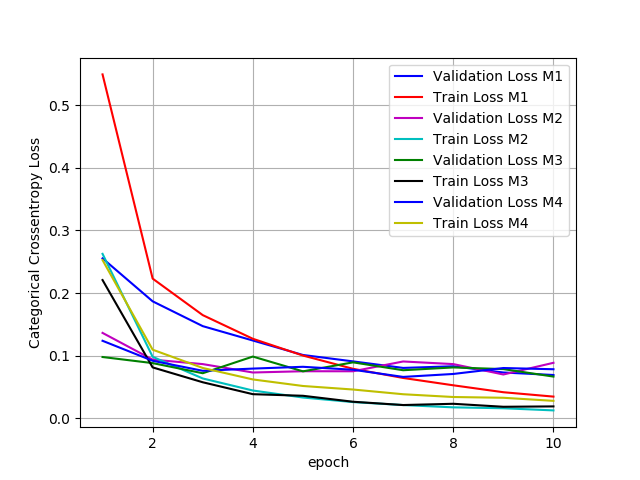

In [35]:
epochs =10
import matplotlib.pyplot as plt
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
x = list(range(1,epochs+1))

vy = history.history['val_loss']
ty = history.history['loss']
ax.plot(x, vy, 'b', label="Validation Loss M1")
ax.plot(x, ty, 'r', label="Train Loss M1")
vy = history2.history['val_loss']
ty = history2.history['loss']
ax.plot(x, vy, 'm', label="Validation Loss M2")
ax.plot(x, ty, 'c', label="Train Loss M2")
vy = history3.history['val_loss']
ty = history3.history['loss']
ax.plot(x, vy, 'g', label="Validation Loss M3")
ax.plot(x, ty, 'k', label="Train Loss M3")
vy = history4.history['val_loss']
ty = history4.history['loss']
ax.plot(x, vy, 'b', label="Validation Loss M4")
ax.plot(x, ty, 'y', label="Train Loss M4")
plt.legend()  
plt.grid()
fig.canvas.draw()

<h2>Conclusions

In [36]:
from prettytable import PrettyTable
x = PrettyTable()

x.field_names = ["Model", "Accuracy"]

x.add_row(["Model 1",97.79])
x.add_row(["Model 2",97.88])
x.add_row(["Model 3",98.29])
x.add_row(["Model 4",97.71])


print(x)

+---------+----------+
|  Model  | Accuracy |
+---------+----------+
| Model 1 |  97.79   |
| Model 2 |  97.88   |
| Model 3 |  98.29   |
| Model 4 |  97.71   |
+---------+----------+
